<a href="https://colab.research.google.com/github/lebatt11/kaggle-/blob/main/train_MobileNet_16_modelCheckpoint_reshuffle_data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Machine learning has a phenomenal range of applications, including in health and diagnostics. This tutorial will explain the complete pipeline from loading data to predicting results, and it will explain how to build an X-ray image classification model from scratch to predict whether an X-ray scan shows presence of pneumonia. This is especially useful during these current times as COVID-19 is known to cause pneumonia.

**Follow the steps to download data from Kaggle 1st time**

Login in Kaggle and download the kaggle.json File from Kaggle settings.
**(One Time Activity)**

Click on the folder icon on left menu bar and upload the kaggle.json file.

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:17<00:00, 29.0MB/s]
100% 2.29G/2.29G [01:17<00:00, 31.7MB/s]


Mount the Google Drive to move the downloaded zip file to google drive so that we don't have to download all the time

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Create a folder as per mentioned below directory
***Colab Notebooks/chest-xray-pneumonia/dataset***
Post that move the file using the below code

In [7]:
mv '/content/chest-xray-pneumonia.zip' 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/'

 ---------------------------------------------------------------------

**Follow the below steps if you have the data zip file downloaded from kaggle in your gdrive**

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
mkdir /content/dataset/

In [10]:
mkdir /content/dataset/fid

In [11]:
mkdir /content/dataset/oid

In [12]:
! unzip "gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/chest-xray-pneumonia" -d /content/dataset/oid

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0442-

In [13]:
mkdir /content/output

In [17]:
mkdir /content/utils

mkdir: cannot create directory ‘/content/utils’: File exists


In [18]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/config.py' '/content/utils/config.py'

In [19]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/conv_bc_model.py' '/content/utils/conv_bc_model.py'

In [20]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/create_dataset.py' '/content/utils/create_dataset.py'

In [21]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/getPaths.py' '/content/utils/getPaths.py'

In [22]:
rm -rf /content/dataset/fid/chest_xray/__MACOSX

In [23]:
rm -rf /content/dataset/fid/chest_xray/chest_xray

In [24]:
mv '/content/dataset/oid/chest_xray/test' '/content/dataset/oid/'

In [25]:
mv '/content/dataset/oid/chest_xray/train' '/content/dataset/oid/'

In [26]:
mv '/content/dataset/oid/chest_xray/val' '/content/dataset/oid/'

In [27]:
rm -rf '/content/dataset/oid/chest_xray'

In [28]:
rm -rf '/content/dataset/oid/test/.ipynb_checkpoints'

In [29]:
rm -rf '/content/dataset/oid/train/.ipynb_checkpoints'

In [30]:
rm -rf '/content/dataset/oid/val/.ipynb_checkpoints'

In [31]:
mv '/content/dataset/oid/train/NORMAL' '/content/dataset/oid/train/0'

In [32]:
mv '/content/dataset/oid/train/PNEUMONIA' '/content/dataset/oid/train/1'

In [33]:
mv '/content/dataset/oid/test/NORMAL' '/content/dataset/oid/test/0'

In [34]:
mv '/content/dataset/oid/test/PNEUMONIA' '/content/dataset/oid/test/1'

In [35]:
mv '/content/dataset/oid/val/NORMAL' '/content/dataset/oid/val/0'

In [36]:
mv '/content/dataset/oid/val/PNEUMONIA' '/content/dataset/oid/val/1'

Running the Build Dataset file to shuffle and create the train test val folders and files

In [37]:
! python /content/utils/create_dataset.py

Building 'training' split
'Creating /content/dataset/fid/training' directory
'creating /content/dataset/fid/training/1' directory
'creating /content/dataset/fid/training/0' directory
Building 'validation' split
'Creating /content/dataset/fid/validation' directory
'creating /content/dataset/fid/validation/1' directory
'creating /content/dataset/fid/validation/0' directory
Building 'testing' split
'Creating /content/dataset/fid/testing' directory
'creating /content/dataset/fid/testing/1' directory
'creating /content/dataset/fid/testing/0' directory


-------------------------------------------------------------------------------

## Model Building and Evaluation

In [ ]:
# Mounting the google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# Google Drive Path
# gDrivePath = "gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/"

In [ ]:
# import sys
# sys.path.append(gDrivePath)

In [38]:
# Setting the matplotlib backend so that if required then images can be saved in the background
import matplotlib
matplotlib.use("Agg")
%matplotlib inline

In [39]:
# Importing the libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from utils import config
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
# pip install seaborn

In [40]:
!pip install seaborn

In [41]:
# Defining a function for plotting the count of data against each class in each directory
def plotData(dirPath):
    # Get the path to the normal and pneumonia sub-directories
    normal_cases_dir = dirPath+ '/0/'
    pneumonia_cases_dir = dirPath + '/1/'

    # Get the list of all the images
    normal_cases = glob.glob(normal_cases_dir + '*.jpeg')
    pneumonia_cases = glob.glob(pneumonia_cases_dir + '*.jpeg')

    # An empty list. We will insert the data into this list in (img_path, label) format
    data1 = []

    # Go through all the normal cases. The label for these cases will be 0
    for img in normal_cases:
        data1.append((img,0))

    # Go through all the pneumonia cases. The label for these cases will be 1
    for img in pneumonia_cases:
        data1.append((img, 1))

    # Get a pandas dataframe from the data we have in our list
    data1 = pd.DataFrame(data1, columns=['image', 'label'],index=None)

    # Shuffle the data
    data1 = data1.sample(frac=1.).reset_index(drop=True)



    # Get the counts for each class
    cases_count = data1['label'].value_counts()
    print(cases_count)

    # Plot the results
    plt.figure(figsize=(10,8))
    sns.barplot(x=cases_count.index, y= cases_count.values)
    plt.title('Number of cases', fontsize=14)
    plt.xlabel('Case type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
    plt.show()

1    3095
0    1121
Name: label, dtype: int64


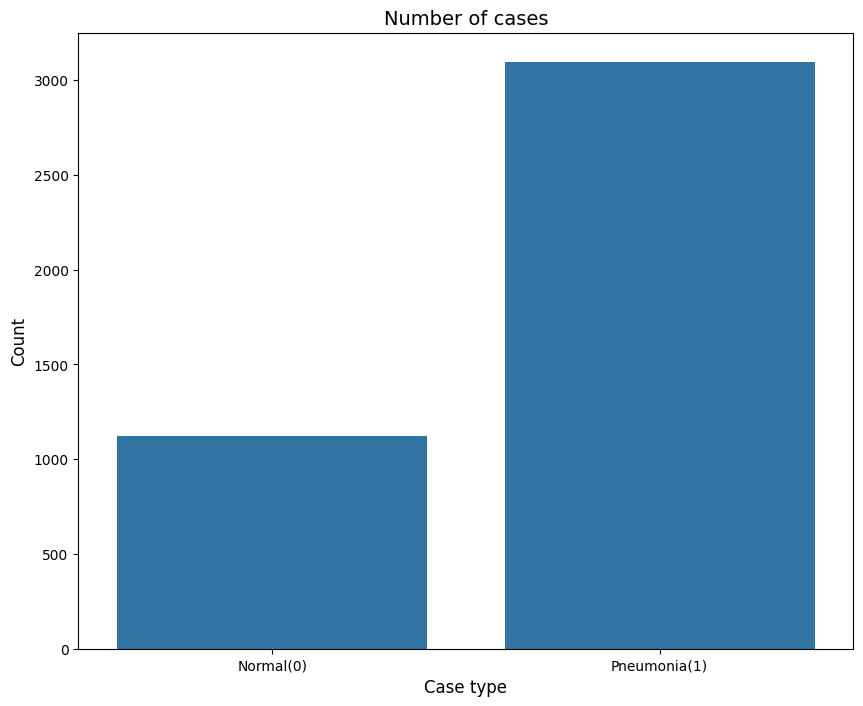

In [42]:
plotData(config.TRAIN_PATH)

1    844
0    328
Name: label, dtype: int64


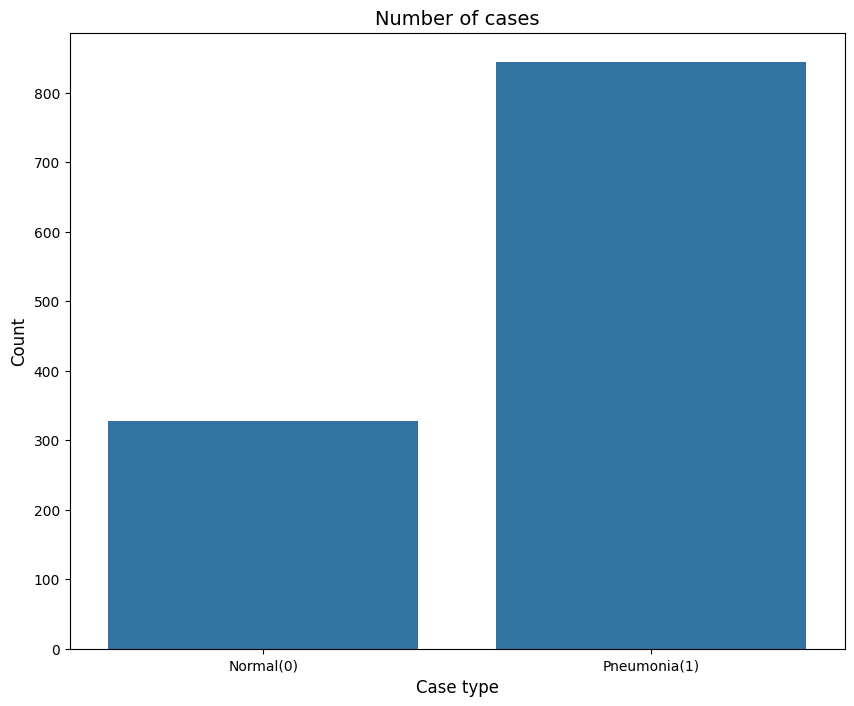

In [43]:
plotData(config.TEST_PATH)

1    334
0    134
Name: label, dtype: int64


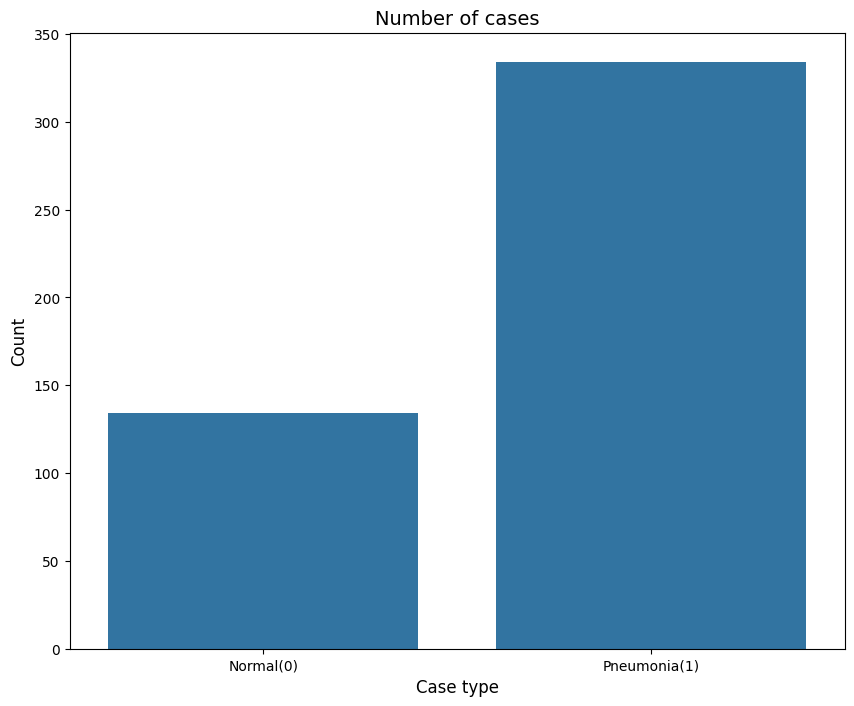

In [44]:
plotData(config.VAL_PATH)

In [45]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = config.TRAIN_PATH + '/0/'
pneumonia_cases_dir = config.TRAIN_PATH + '/1/'

# Get the list of all the images
normal_cases = glob.glob(normal_cases_dir + '*.jpeg')
pneumonia_cases = glob.glob(pneumonia_cases_dir + '*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data1 = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data1.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data1.append((img, 1))

# Get a pandas dataframe from the data we have in our list
train_data1 = pd.DataFrame(train_data1, columns=['image', 'label'],index=None)

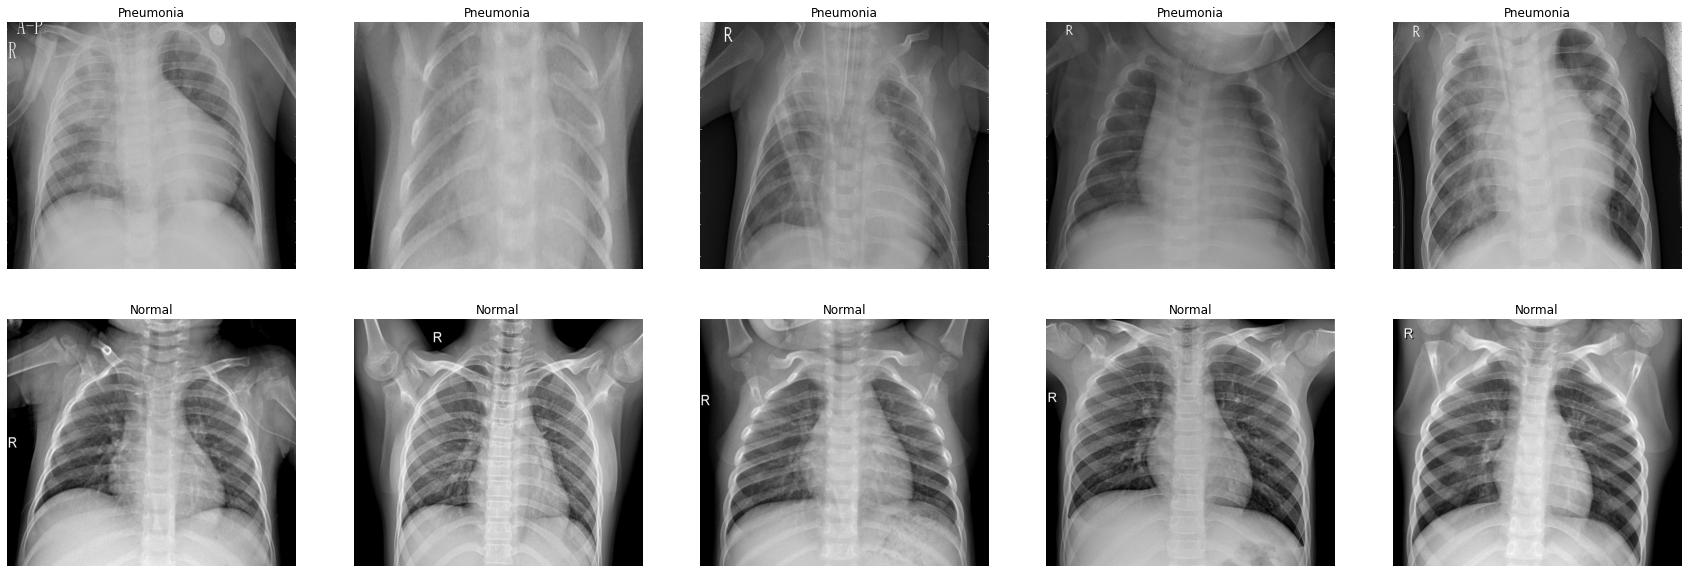

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_data1[train_data1['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data1[train_data1['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = cv2.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

If we look carefully, then there are some cases where we won't be able to differentiate between a normal case and a pneumonia case with the naked eye. If we can build a robust classifier, it would be a great assist for the doctor too.

In [46]:
# Defining a method to get the number of files given a path
def retrieveNumberOfFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return len(list1)

In [47]:
# Defining a method to plot training and validation accuracy and loss
def training_plot(H, N, plotPath):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plotPath)

In [48]:
# Checking for the total number of image paths in training, validation and testing directories
totalTrain = retrieveNumberOfFiles(config.TRAIN_PATH)
totalVal = retrieveNumberOfFiles(config.VAL_PATH)
totalTest = retrieveNumberOfFiles(config.TEST_PATH)

In [49]:
# Defining a method to get the number of files given a path
def getAllFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return list1

In [50]:
# Retrieving all files from train directory
allTrainFiles = getAllFiles(config.TRAIN_PATH)

In [51]:
allTrainFiles

['/content/dataset/fid/training/1/person326_bacteria_1506.jpeg',
 '/content/dataset/fid/training/1/person12_bacteria_48.jpeg',
 '/content/dataset/fid/training/1/person49_bacteria_236.jpeg',
 '/content/dataset/fid/training/1/person264_bacteria_1234.jpeg',
 '/content/dataset/fid/training/1/person25_bacteria_115.jpeg',
 '/content/dataset/fid/training/1/person493_bacteria_2086.jpeg',
 '/content/dataset/fid/training/1/person1040_bacteria_2974.jpeg',
 '/content/dataset/fid/training/1/person260_virus_541.jpeg',
 '/content/dataset/fid/training/1/person1526_bacteria_3986.jpeg',
 '/content/dataset/fid/training/1/person1599_virus_2775.jpeg',
 '/content/dataset/fid/training/1/person1358_virus_2339.jpeg',
 '/content/dataset/fid/training/1/person113_bacteria_541.jpeg',
 '/content/dataset/fid/training/1/person152_virus_303.jpeg',
 '/content/dataset/fid/training/1/person1107_bacteria_3048.jpeg',
 '/content/dataset/fid/training/1/person1663_bacteria_4411.jpeg',
 '/content/dataset/fid/training/1/person3

In [52]:
# Calculating the total number of training images against each class and then store the class weights in a dictionary
trainLabels = [int(p.split(os.path.sep)[-2]) for p in allTrainFiles]
trainLabels = to_categorical(trainLabels)
classTotals = trainLabels.sum(axis=0)
classWeight = dict()

# Looping over all classes and calculate the class weights
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [53]:
trainLabels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [54]:
classTotals

array([1121., 3095.], dtype=float32)

In [55]:
classTotals.max()

3095.0

In [56]:
classTotals[0]

1121.0

In [57]:
classTotals[1]

3095.0

In [58]:
classWeight = dict()
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [59]:
classWeight

{0: 2.7609277, 1: 1.0}

In [60]:
# Initialize the training data augmentation object
## preprocess_input will scale input pixels between -1 and 1
## rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
## zoom_range is for randomly zooming inside pictures
## width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
## shear_range is for randomly applying shearing transformations
## horizontal_flip and vertical_flip is for randomly flipping half of the images horizontally and vertically resp
## fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

trainAug = ImageDataGenerator(
	preprocessing_function=preprocess_input,
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

In [62]:
# Initialize the validation data augmentation object
valAug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [63]:
# Initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=True,
	batch_size=config.BATCH_SIZE)

Found 4216 images belonging to 2 classes.


In [64]:
# Initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 468 images belonging to 2 classes.


In [65]:
# Initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 1172 images belonging to 2 classes.


In [66]:
# Loading the MobileNetV2, ensuring the head Full Connected layers are left off / removed
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

9406464/9406464 [==============================] - 1s 0us/step


In [67]:
# Construct the head of the model that will be placed on top of the the base model
## Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
## We flatten the output of the convolutional layers to create a single long feature vector.
### Average pooling computes the average of the elements present in the region of feature map covered by the filter.
#### ReLU stands for Rectified Linear Unit.
#### The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.
## Dropout is a technique where randomly selected neurons are ignored during training.

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)

In [68]:
# Placing the head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

In [69]:
# Loop over all the layers of the base model and freeze them so that they are
# not updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

In [70]:
!pip install keras

In [71]:
from keras.optimizers import Adam

In [72]:
# Compiling the model
## Decay updates the learning rate by a decreasing factor in each epoch
print("Compiling the model")
opt = Adam(learning_rate=config.INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

Compiling the model


In [73]:
# Using ModelCheckpoint to store the best performing model based on val_loss
MCName = os.path.sep.join([config.outputPath, "weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
checkpoint = ModelCheckpoint(MCName, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [74]:
# Fitting the model on training data
print("Model Fitting")
MF = model.fit(
    x=trainGen,
    steps_per_epoch=totalTrain // config.BATCH_SIZE,
    validation_data=valGen,
    validation_steps=totalVal // config.BATCH_SIZE,
    class_weight=classWeight,
    callbacks=callbacks,
    epochs=config.EPOCHS)

Model Fitting
Epoch 1/20
263/263 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.7990
Epoch 1: val_loss improved from inf to 0.32422, saving model to /content/output/weights-001-0.3242.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


263/263 [==============================] - 80s 279ms/step - loss: 0.6884 - accuracy: 0.7990 - val_loss: 0.3242 - val_accuracy: 0.8879
Epoch 2/20
263/263 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.8843
Epoch 2: val_loss improved from 0.32422 to 0.29477, saving model to /content/output/weights-002-0.2948.hdf5
263/263 [==============================] - 75s 285ms/step - loss: 0.4208 - accuracy: 0.8843 - val_loss: 0.2948 - val_accuracy: 0.8793
Epoch 3/20
263/263 [==============================] - ETA: 0s - loss: 0.3773 - accuracy: 0.8945
Epoch 3: val_loss did not improve from 0.29477
263/263 [==============================] - 75s 284ms/step - loss: 0.3773 - accuracy: 0.8945 - val_loss: 0.3269 - val_accuracy: 0.8642
Epoch 4/20
263/263 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.9031
Epoch 4: val_loss improved from 0.29477 to 0.24231, saving model to /content/output/weights-004-0.2423.hdf5
263/263 [==============================] - 75s 

In [96]:
import os
from keras.models import load_model

# Spécifiez le chemin vers le fichier HDF5
path1 = config.outputPath + '/MN_16_weights-016-0.2087.hdf5'

# Vérifiez si le fichier HDF5 existe avant de le charger
if os.path.exists(path1):
    fModel = load_model(path1)
    print("Modèle chargé avec succès !")
else:
    print(f"Erreur: Aucun fichier trouvé à l'emplacement {path1}")

Modèle chargé avec succès !


In [97]:
# Loading the best performing model
# Please specify the model name from the output folder which has the lowest val_loss
path1 = config.outputPath + '/MN_16_weights-016-0.2087.hdf5'
fModel = load_model(path1)

In [98]:
print(path1)

/content/output/MN_16_weights-016-0.2087.hdf5


In [99]:
# Predicting on the test data
# The numpy.argmax() function returns indices of the max element of the array in a particular axis.
print("Predicting on the test data")
predTest = fModel.predict(x=testGen, steps=(totalTest // config.BATCH_SIZE) + 1)
predTest = np.argmax(predTest, axis=1)

Predicting on the test data
74/74 [==============================] - 11s 137ms/step


In [100]:
# Printing the Classification Report
print(classification_report(testGen.classes, predTest, target_names=testGen.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       328
           1       0.99      0.92      0.95       844

    accuracy                           0.93      1172
   macro avg       0.90      0.94      0.92      1172
weighted avg       0.94      0.93      0.93      1172



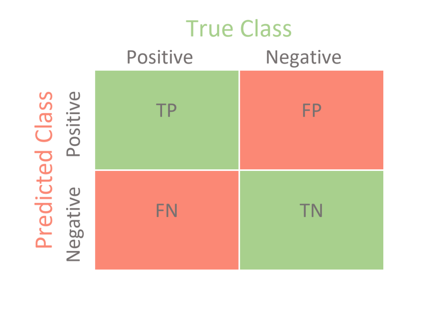

In [101]:
# Computing the confusion matrix and and using the same to derive the
# accuracy, sensitivity, and specificity
# Accuracy = TP + TN / TP + TN + FP + FN
# Sensitivity = TP / TP + FN
# Specificity = TN / FP + TN
cm = confusion_matrix(testGen.classes, predTest)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Printing the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[318  10]
 [ 71 773]]
acc: 0.9309
sensitivity: 0.9695
specificity: 0.9159


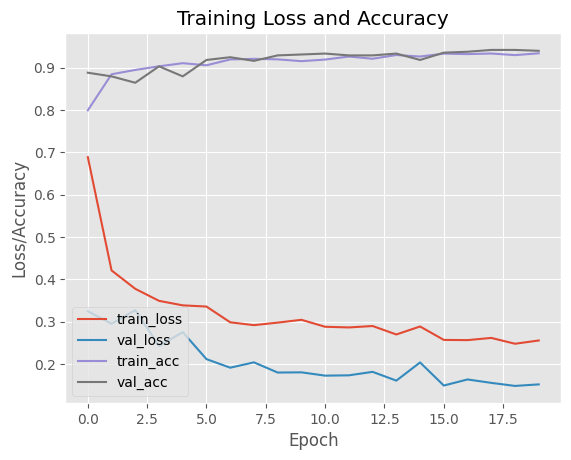

In [102]:
# Plotting the graph
training_plot(MF, config.EPOCHS, config.PLOT_PATH)

In [103]:
# Serialize/Writing the model to disk
print("Serializing network...")
fModel.save(config.MODEL_PATH, save_format="h5")

Serializing network...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
